In [1]:
pip install qibo

In [2]:
pip install qibojit

In order to run simulation, we set the qibojit backend as it's more suitable to run simulation and many qubits.

In [8]:
import numpy as np
import qibo
from qibo import Circuit,gates, hamiltonians
#setting the backend:
qibo.set_backend('qibojit',platform="numba")

[Qibo 0.2.9|INFO|2024-07-30 05:44:15]: Using qibojit (numba) backend on /CPU:0
INFO:qibo.config:Using qibojit (numba) backend on /CPU:0


In [12]:
#Building first qibo circuit:
n=4
c=Circuit(nqubits=n)
print(c.draw())

q0: ─
q1: ─
q2: ─
q3: ─


In [21]:
#adding gates to the circuit:

c.add(gates.H(q=0))#applying hadamard to frst qubit
c.add(gates.H(q=1))#applying hadamard to second qubit
c.add(gates.Z(q=3))#applying Pauli's Z gate to 4th qubit
c.add(gates.X(q=0))#applying Pauli's X gate to 3rd qubit
c.add(gates.CNOT(q0=0,q1=2))
c.add(gates.CZ(q0=2,q1=1))
c.add(gates.Y(q=1).controlled_by(2,3,0))
print(c.draw())
print()
print(c.summary())





q0: ─H─H─H─H─X─o─H─X─o───H─X─o───o─H─X─o───o─H─X─o───o─
q1: ─H─H─H─H───|─H───|─Z─H───|─Z─Y─H───|─Z─Y─H───|─Z─Y─
q2: ─X─────────X─────X─o─────X─o─o─────X─o─o─────X─o─o─
q3: ─Z─Z─────────Z───────Z───────o─Z───────o─Z───────o─

Circuit depth = 24
Total number of gates = 40
Number of qubits = 4
Most common gates:
h: 16
z: 6
x: 6
cx: 5
cz: 4
y: 3


In [35]:
#executing the circuit:
print(c())
print()
#printing the final state:
print(c().state())

(-0.5+0j)|0100> + (-0.5+0j)|0110> + (0.5+0j)|1000> + (-0.5+0j)|1010>

[ 0. +0.j -0. +0.j  0. +0.j -0. +0.j -0.5+0.j -0. +0.j -0.5+0.j  0. -0.j
  0.5+0.j -0. +0.j -0.5+0.j  0. -0.j  0. +0.j -0. +0.j -0. +0.j -0. +0.j]


In [36]:
#to print the probabilities from the outcome:
probs=c().probabilities()
print(probs)


[0.   0.   0.   0.   0.25 0.   0.25 0.   0.25 0.   0.25 0.   0.   0.
 0.   0.  ]


In [37]:
#in order to add measurement gates, we copy the initial steps again:

n=4
c=Circuit(nqubits=n)
c.add(gates.H(q=0))#applying hadamard to frst qubit
c.add(gates.H(q=1))#applying hadamard to second qubit
c.add(gates.Z(q=3))#applying Pauli's Z gate to 4th qubit
c.add(gates.X(q=0))#applying Pauli's X gate to 3rd qubit
c.add(gates.CNOT(q0=0,q1=2))
c.add(gates.CZ(q0=2,q1=1))
c.add(gates.Y(q=1).controlled_by(2,3,0))
#adding measurement gates now:

c.add(gates.M(*range(n)))
print(c.draw())




q0: ─H─X─o───o─M─
q1: ─H───|─Z─Y─M─
q2: ─────X─o─o─M─
q3: ─Z───────o─M─


In [40]:
#Again we can execute and collect the outcome.
#but now we can mention the shots
outcome=c(nshots=1000)
print(outcome)
print()
print(outcome.probabilities())

(0.5+0j)|0000> + (0.5+0j)|0100> + (0.5+0j)|1010> + (-0.5+0j)|1110>

[0.25 0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.25 0.   0.   0.
 0.25 0.  ]


In [41]:
#to collect the frequencies(no.of shots)
frequencies=outcome.frequencies()
print(frequencies)

Counter({'0000': 273, '0100': 250, '1110': 241, '1010': 236})


In [42]:
pip install git+https://github.com/qiboteam/qiboedu

  Cloning https://github.com/qiboteam/qiboedu to /tmp/pip-req-build-828al6d0
  Running command git clone --filter=blob:none --quiet https://github.com/qiboteam/qiboedu /tmp/pip-req-build-828al6d0
  Resolved https://github.com/qiboteam/qiboedu to commit c05f53215f1e0efff377a0310748b8dc3753dac7
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 66.6 MB/s eta 0:00:00
  Created wheel for qiboedu: filename=qiboedu-0.1.0-py3-none-any.whl size=17157 sha256=ee8fcb5e69457b334e4b74db5bfaf94ba2eb8685931b5b26bbac065927387e96
  Stored in directory: /tmp/pip-ephem-wheel-cache-004cl8_0/wheels/88/3e/b3/56312e57970f2fabccd0b51c358665866db085f22720ced56a
Successfully built qiboedu
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


STATE VISUALIZATION:

We can use the 'scripts.plotscripts.visualize_state' function, which takes as an argument the counter object you get calling circuit(nshots=nshots).frequencies(binary=True).



In [45]:
from qiboedu.scripts.plotscripts import visualize_states

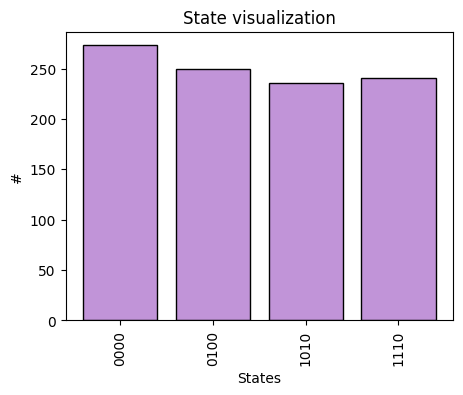

In [46]:
visualize_states(frequencies)

*Combining circuits*: two or more circuits into one!

In [48]:
# initialize c1:
c1 = Circuit(3)
c1.add(gates.H(0))
c1.add(gates.CNOT(1,0))
c1.add(gates.Z(1))
print(c1.draw())


q0: ─H─X───
q1: ───o─Z─
q2: ───────


In [49]:
#initialize c2:
c2 = Circuit(3)
c2.add(gates.H(2))
c2.add(gates.Z(1))
c2.add(gates.Y(1))
c2.add(gates.CZ(2,1))
print(c2.draw())


q0: ───────
q1: ─Z─Y─Z─
q2: ─H───o─


In [52]:
#combining these two circuits:
c=c2+c1
print(c.draw())
print()
c=c1+c2
print(c.draw())

q0: ───────H─X───
q1: ─Z─Y─Z───o─Z─
q2: ─H───o───────

q0: ─H─X─────────
q1: ───o─Z─Z─Y─Z─
q2: ─────H─────o─


Simulating Bell's state: create a two-qubit circuit, lead one of the two qubits to a superposed state using an Hadamard gate and then apply a controlled-NOT gate to the second qubit using the superposed one as control.

In [60]:
c = Circuit(2)
c.add(gates.H(0))
c.add(gates.CNOT(q0=0, q1=1))
print(c.add(gates.M(*range(2)))) #measurement part
print()
print(c(nshots=2000)) #outcome

MeasurementResult(qubits=(0, 1), nshots=0)

(0.70711+0j)|00> + (0.70711+0j)|11>


Counter({'11': 541, '00': 459})


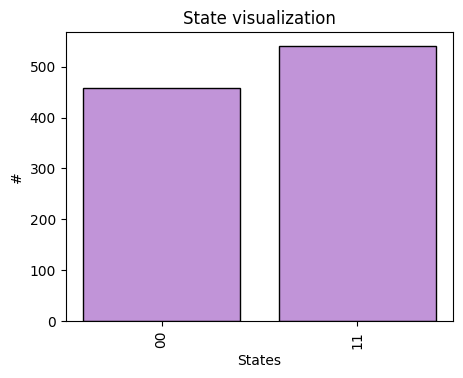

In [61]:
frequencies=c().frequencies()
print(frequencies)
visualize_states(frequencies)

Parameterized gates : are those gates which are used to manipulate the quantum states.

In [67]:
nqubits=2
nlayers=2 #the loop goes twice
c = Circuit(nqubits=nqubits)
for l in range(nlayers):
  for q in range(nqubits):
    c.add(gates.RY(q=q, theta=0))
    c.add(gates.RZ(q=q, theta=0))

c.add(gates.M(*range(nqubits)))

print(c.draw())


q0: ─RY─RZ─RY─RZ─M─
q1: ─RY─RZ─RY─RZ─M─


In [71]:
#modified code
nqubits=2
nlayers=2 #the loop goes twice
c = Circuit(nqubits=nqubits)
for l in range(nlayers):
  for q in range(nqubits):
    c.add(gates.RY(q=q, theta=0))
    c.add(gates.RZ(q=q, theta=0)) #theeta is set to 0
  c.add(gates.CNOT(q0=0,q1=nqubits-1))
c.add(gates.M(*range(nqubits)))

print(c.draw())
#All the rotational angles are now set to zero, and the final state is equal to the initial state


q0: ─RY─RZ─o─RY─RZ─o─M─
q1: ─RY─RZ─X─RY─RZ─X─M─


(1+0j)|00>


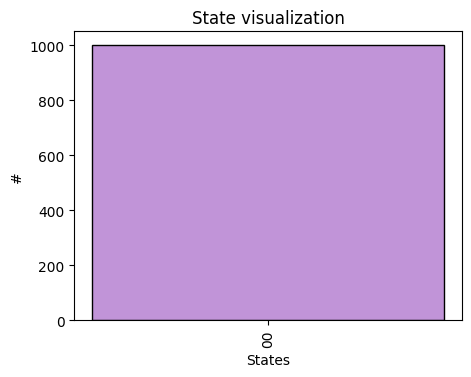

In [73]:
# execute the circuit and collect frequencies
outcome = c(nshots=1000)
freq = outcome.frequencies()

print(outcome)

visualize_states(freq)

In [78]:
params=c.get_parameters()
c.get_parameters()

[(0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,)]

In [81]:
#generating a new random list of parameters:
np.random.seed(42)
angles=np.random.random(len(params))
print(angles)



[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
 0.05808361 0.86617615]


In [84]:
#adding these new set of angles as parameters
c.set_parameters(angles)
print(c.draw())
print()
c.get_parameters()

q0: ─RY─RZ─o─RY─RZ─o─M─
q1: ─RY─RZ─X─RY─RZ─X─M─



[(0.3745401188473625,),
 (0.9507143064099162,),
 (0.7319939418114051,),
 (0.5986584841970366,),
 (0.15601864044243652,),
 (0.15599452033620265,),
 (0.05808361216819946,),
 (0.8661761457749352,)]

(0.24457-0.8724j)|00> + (0.35732+0.04459j)|01> + (0.16235+0.12021j)|10> + (0.08551-0.03628j)|11>


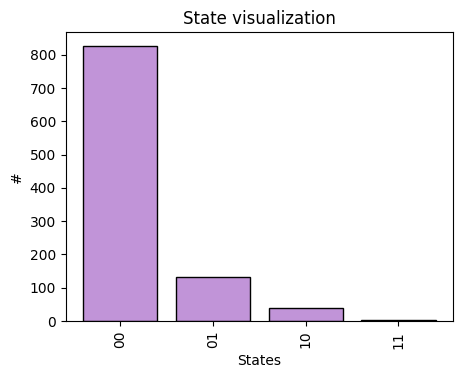

In [85]:
outcome = c(nshots=1000)
freq = outcome.frequencies()

print(outcome)
visualize_states(freq)

Hamiltonians:
 Qibo stores a set of precomputed hamiltonians, which can be called and used to compute expectation values on the states we manipulate using circuits. One of it is the TFIM- transverse field ising model.

In [87]:
#defining hamiltonian:
h=hamiltonians.TFIM(2)
matrix=h.matrix
print(matrix)

[[-2.-0.j -0.-0.j -0.-0.j -0.-0.j]
 [-0.-0.j  2.-0.j -0.-0.j -0.-0.j]
 [-0.-0.j -0.-0.j  2.-0.j -0.-0.j]
 [-0.-0.j -0.-0.j -0.-0.j -2.-0.j]]


In [93]:
#finding the eigenstates,eigenvalues and ground state
print(h.eigenvectors())
print()
print(h.eigenvalues())
print()
print(h.ground_state())


[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]

[-2. -2.  2.  2.]

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


In [96]:
#the expectation value of an hamiltonian over a target state
# compute the expectation < psi | H | psi > : the circuit we obtained above by a series of rotations
print(c().state()) #final state
h.expectation(c().state())



[0.24456537-0.8724044j  0.35731797+0.04459447j 0.16234611+0.12020721j
 0.08550659-0.03627859j]


-1.3181166854990443